<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/air-2022/blob/main/notebooks/9_tabele_wykresy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pzn = pd.read_excel("rent-poznan.xlsx")
pzn.head(n=2)

,id,date_activ,date_modif,date_expire,individual,price,flat_area,flat_rooms,flat_floor_no,flat_build_year,flat_furnished,flat_rent,flat_deposit,flat_price_include_rent,flat_for_students,flat_heating,flat_status,flat_windows,building_floor_num,building_type,building_material,ad_title,ad_seller_id,ad_promo,flat_balcony,flat_utility_room,flat_garage,flat_basement,flat_garden,flat_tarrace,flat_lift,flat_two_level,flat_kitchen_sep,flat_air_cond,flat_nonsmokers,flat_washmachine,flat_dishwasher,flat_fridge,flat_cooker,flat_oven,flat_tv_device,flat_internet,flat_television,flat_phone,flat_anti_blinds,flat_anti_doors_windows,flat_intercom,flat_monitoring,flat_alarm_sys,flat_closed_area,quarter
0,19576742,2015-03-24,2020-09-05,2020-10-05,True,1400,30.0,1,2.0,0,True,360,1400.0,False,True,0.0,0.0,0.0,0,0.0,NaN,"Ładna, kawalerka. BEZPOŚREDNIO.",592916,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,Rataje
1,20292499,2013-07-19,2020-08-30,2020-09-09,True,4600,160.0,4,4.0,1900,True,0,0.0,False,True,1.0,0.0,0.0,5,1.0,0.0,Apartment in very center of Poznan - direct of...,226529,False,False,True,False,False,False,False,False,False,True,False,False,True,True,True,True,True,False,True,True,True,False,False,True,True,True,False,Stare Miasto


In [3]:
pzn_sub = pzn.query("price >= 500 & price <= 15000 & flat_area >= 15 & flat_area <= 150")
pzn_sub.shape

(16199, 51)

# Tabele przestawne

Będziemy korzystać z funkcji `pd.pivot_table`, która ma następujące argumenty:

+ `data` -- zbiór danych
+ `values` -- kolumna(y) do agregacji
+ `index` -- zmienne grupujące
+ `aggfunc` -- funkcja(e) agregująca(e)

In [5]:
pd.pivot_table(data = pzn_sub, values = "price", index = "flat_rooms", aggfunc = "mean")

,price
flat_rooms,
1,1316.650244
2,1760.564434
3,2190.501624
4,2785.335404
5,3188.478261
6,3001.000000
7,875.000000
8,3500.000000
9,1100.000000


In [6]:
pzn_sub.pivot_table(values = "price", index = "flat_rooms",  aggfunc= "mean")

,price
flat_rooms,
1,1316.650244
2,1760.564434
3,2190.501624
4,2785.335404
5,3188.478261
6,3001.000000
7,875.000000
8,3500.000000
9,1100.000000


In [8]:
pzn_sub.pivot_table(values = ["price", "flat_area"], index = "flat_rooms",  aggfunc= "mean")

,flat_area,price
flat_rooms,,
1,30.508580,1316.650244
2,47.119923,1760.564434
3,64.622232,2190.501624
4,87.561946,2785.335404
5,108.052391,3188.478261
6,106.920000,3001.000000
7,21.500000,875.000000
8,112.000000,3500.000000
9,49.000000,1100.000000


In [15]:
pzn_sub.pivot_table(values = "price", index = "flat_rooms", 
                    columns = "individual", aggfunc="count", 
                    fill_value = 0)

individual,False,True
flat_rooms,,
1,2973,1330
2,5692,2580
3,2226,852
4,377,106
5,39,7
6,8,2
7,2,0
8,1,0
9,1,0


In [17]:
pzn_sub.pivot_table(values = "price", index = "individual", aggfunc = np.median)

,price
individual,
False,1600
True,1650


In [19]:
pzn_sub.pivot_table(values = "price", index = "individual", aggfunc = [np.median, np.mean])
pzn_sub.pivot_table(values = "price", index = "flat_for_students", aggfunc = [np.median, np.mean])

,median,mean
,price,price
flat_for_students,,
False,1650,1802.006109
True,1600,1640.252941


Liczymy ile jest obserwacji, które spełniają warunek, że cena jest większa niż 2000 zł.

In [20]:
pzn_sub.pivot_table(values = "price",
                    index = "flat_for_students",
                    aggfunc = lambda x: sum(x >= 2000))

,price
flat_for_students,
False,3532
True,827


In [37]:
tabela = pzn_sub.pivot_table(values = "price",
                    index = ["flat_for_students", "flat_furnished"],
                    aggfunc = { ("srednia", np.mean),
                                ("liczba_2000", lambda x: sum(x >= 2000)),
                                ("liczba", "count"),
                                ("odsetek", lambda x: sum(x >= 2000)/ len(x) * 100)})

In [42]:
type(tabela)
tabela.stack().reset_index()

,flat_for_students,flat_furnished,level_2,0
0,False,False,liczba,7612.000000
1,False,False,liczba_2000,2081.000000
2,False,False,odsetek,27.338413
3,False,False,srednia,1752.603389
4,False,True,liczba,4337.000000
5,False,True,liczba_2000,1451.000000
6,False,True,odsetek,33.456306
7,False,True,srednia,1888.714319
8,True,False,liczba,517.000000
9,True,False,liczba_2000,100.000000


## Wizualizacja danych z wykorzystaniem biblioteki seaborn

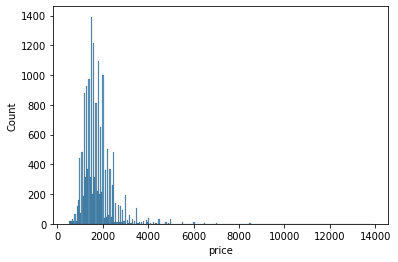

In [45]:
sns.histplot(data = pzn_sub, x = "price")

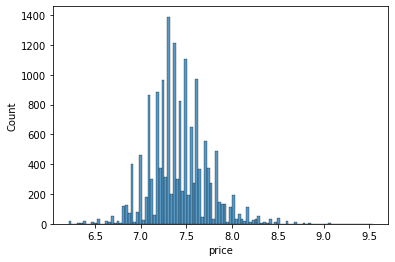

In [46]:
sns.histplot(x = np.log(pzn_sub.price))

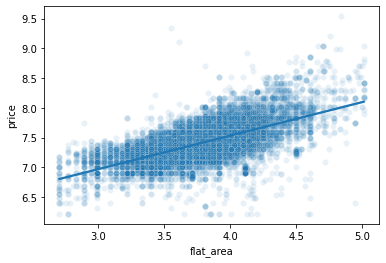

In [53]:
#sns.jointplot(x = pzn_sub.flat_area, y = pzn_sub.price, alpha = 0.1, )
sns.scatterplot(x = np.log(pzn_sub.flat_area), y = np.log(pzn_sub.price), alpha = 0.1)
sns.regplot(x = np.log(pzn_sub.flat_area), y = np.log(pzn_sub.price), scatter = False)

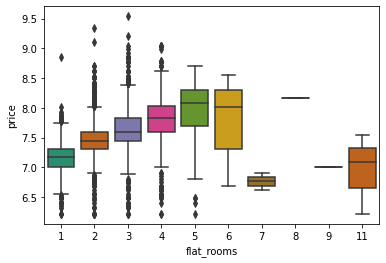

In [60]:
sns.boxplot(x = pzn_sub.flat_rooms, y = np.log(pzn_sub.price), palette= "Dark2")

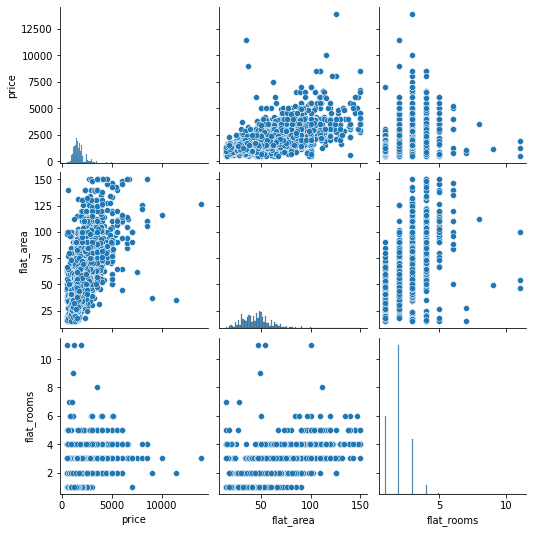

In [61]:
sns.pairplot(data = pzn_sub, vars = ["price", "flat_area", "flat_rooms"])